# W07 - Class Assignment  
**Howie Homan / 0706022310040**


## Exploratory Data Analysis (EDA)

In [30]:
# Load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)

# Display first few rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [32]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [33]:
# Rename the 'Annual Income (k$)' column for easier reference
df = df.rename(columns={"Annual Income (k$)": "Income"})
df.head()


,CustomerID,Gender,Age,Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


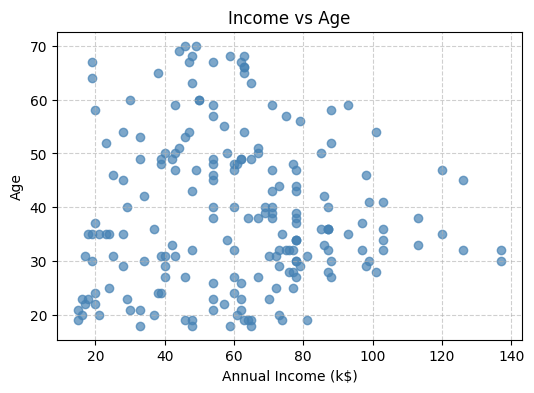

In [34]:
# Scatter plot: Income vs Age
plt.figure(figsize=(6,4))
plt.scatter(df['Income'], df['Age'], color='steelblue', alpha=0.7)
plt.title('Income vs Age', fontsize=12)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.show()


In [35]:
# Create new dataframe that consists of Age, Income, and Spending Score
df = df[['Age', 'Income', 'Spending Score (1-100)']]
df.head()


,Age,Income,Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### Selecting Key Features for Clustering

In this step, we keep only the most relevant features needed for customer segmentation — **Age**, **Income**, and **Spending Score (1–100)**.  

- **Age** represents the customer’s life stage, which can affect spending behavior.  
- **Income** reflects purchasing power and helps distinguish high-value customers.  
- **Spending Score** shows how much each customer tends to spend in the mall.  

By focusing on these three numeric variables, we remove unrelated columns (like `CustomerID` or `Gender`) and prepare a clean dataset for scaling and K-Means clustering.


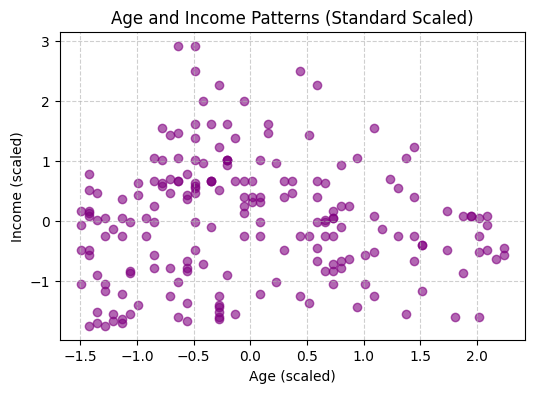

In [36]:
# Scale dataset with StandardScaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_scaled = pd.DataFrame(sc.fit_transform(df), columns=["Age", "Income", "Spending Score (1-100)"])
df_scaled.head()

# Visualization
plt.figure(figsize=(6,4))
plt.scatter(df_scaled["Age"], df_scaled["Income"], color='purple', alpha=0.6)
plt.xlabel("Age (scaled)")
plt.ylabel("Income (scaled)")
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.title("Age and Income Patterns (Standard Scaled)")
plt.show()

# K-Means Clustering

After scaling the data, we apply **K-Means Clustering**, an unsupervised machine learning algorithm used to group customers based on similarities in their features.  
Each cluster represents a group of customers with similar **Age**, **Income**, and **Spending Score** patterns.


In [37]:
from sklearn.cluster import KMeans

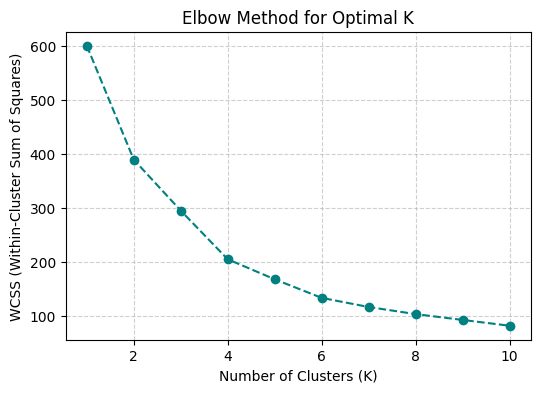

In [38]:
wcss = []
for i in range(1, 11):   # clusters 1–10
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=42
    )
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='teal')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.show()

In [39]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters (K)": range(1, 11),
    "WCSS": wcss
})

# Display the table neatly
print("WCSS (Within-Cluster Sum of Squares) for K = 1 to 10:\n")
display(wcss_table)


WCSS (Within-Cluster Sum of Squares) for K = 1 to 10:



,Number of Clusters (K),WCSS
0,1,600.000000
1,2,389.386189
2,3,295.212246
3,4,205.225147
4,5,168.247580
5,6,133.868421
6,7,117.011555
7,8,103.873292
8,9,93.092891
9,10,82.385154


In [40]:
# Install kneed package (only run once)
!pip install kneed

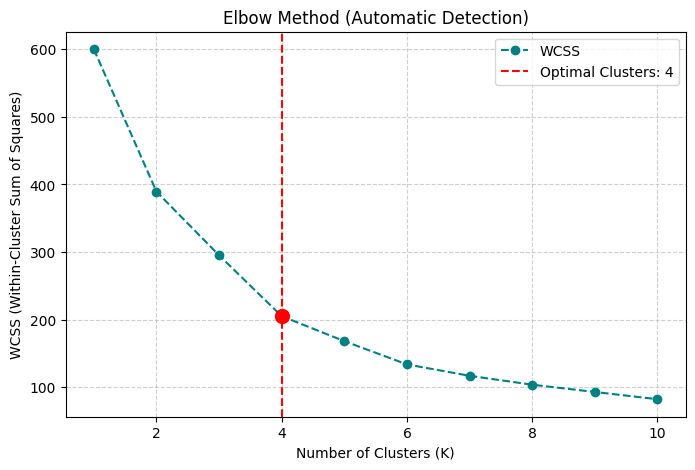

Optimal number of clusters (K): 4


In [41]:
# Determine the optimal number of clusters automatically using KneeLocator
from kneed import KneeLocator

clusters = range(1, 11)

# Find the "elbow" point
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method with detected elbow
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', color='teal', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)
plt.title('Elbow Method (Automatic Detection)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.show()

# Print the optimal K
print(f"Optimal number of clusters (K): {optimal_clusters}")


In [42]:
# Fit K-Means to the data with the optimal number of clusters (K = 4)
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=4,         # chosen based on Elbow or Silhouette
    init='k-means++',
    max_iter=300,
    n_init=10,
    random_state=42
)

# Fit and predict cluster labels
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the original dataframe
df['KMeans_Cluster'] = clusters

# Display the first few rows with assigned clusters
df.head()


,Age,Income,Spending Score (1-100),KMeans_Cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,2
3,23,16,77,2
4,31,17,40,2


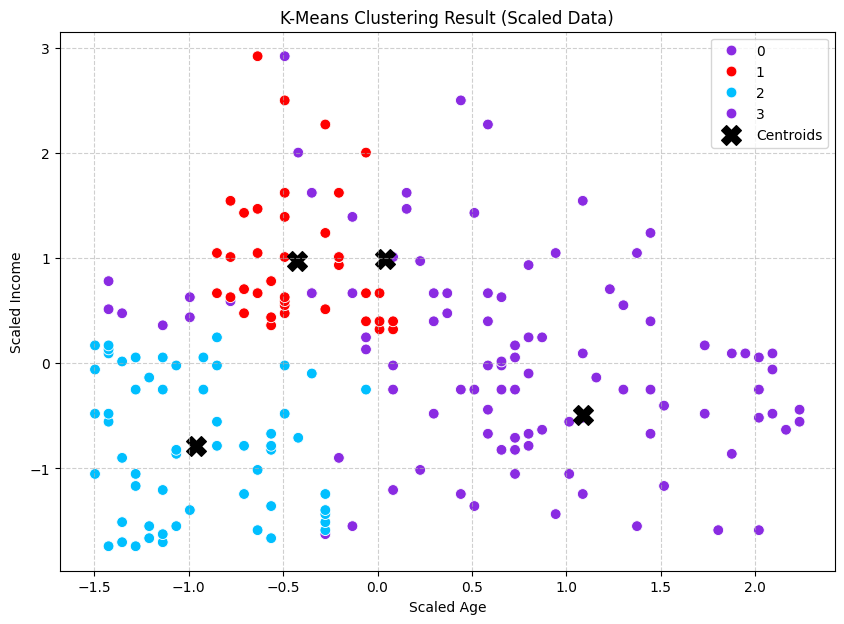

In [43]:
# Visualize the clustering result using scatter plot on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(
    x="Age",
    y="Income",
    hue=clusters,
    palette=["blueviolet", "red", "deepskyblue"],
    data=df_scaled,
    s=60
)

# Plot cluster centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c="black",
    label="Centroids",
    marker='X'
)

plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.title("K-Means Clustering Result (Scaled Data)")
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.show()


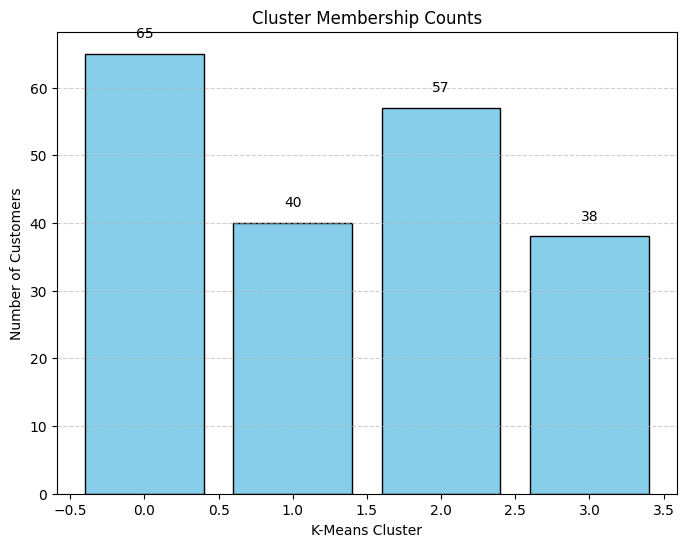

In [44]:
# Visualize number of customers per cluster
cluster_counts = df['KMeans_Cluster'].value_counts().sort_index()

plt.figure(figsize=(8,6))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue', edgecolor='black')

# Add text labels on each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 2,
        str(int(bar.get_height())),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [45]:
# Group the data by cluster and calculate the mean, min, and max for key features
cluster_summary = (
    df.groupby('KMeans_Cluster')
      .agg({
          'Age': ['mean', 'min', 'max'],
          'Income': ['mean', 'min', 'max'],
          'Spending Score (1-100)': ['mean', 'min', 'max']
      })
      .round(2)
)

# Rename axis for clarity
cluster_summary = cluster_summary.rename_axis('KMeans_Cluster')

# Display cluster summary
cluster_summary


Age         Income          Spending Score (1-100)        
                 mean min max   mean min  max                   mean min max
KMeans_Cluster                                                              
0               53.98  35  70  47.71  18   79                  39.97   3  60
1               32.88  27  40  86.10  69  137                  81.53  58  97
2               25.44  18  38  40.00  15   67                  60.30   6  99
3               39.37  19  59  86.50  64  137                  19.58   1  42

# Managerial Implications Based on the Four Clusters

---

### **Cluster 0 – Older / Mid-Income, Low-Spending Consumers**

**Profile:**
- Average age ≈ **54 years**
- Mid income (~ 48 K USD)
- Low spending score (~ 40)
- Likely mature customers or retirees who shop less frequently

**Implications:**
- Emphasize **trust, comfort, and practicality** over luxury  
- Use **traditional marketing** (email, loyalty cards, community events)  
- Offer **value bundles** or **seasonal discounts** to encourage visits  
- Focus on **retention through reliability and service quality**

---

### **Cluster 1 – Affluent / High-Spending Young Professionals**

**Profile:**
- Around **33 years old**
- **High income** (~ 86 K USD)
- **Highest spending** score (~ 82)
- Career-stable, modern, and enjoy lifestyle products and experiences

**Implications:**
- Target with **premium products** and **exclusive experiences**  
- Use **personalized marketing** (VIP programs, early access)  
- Highlight **status, quality, and convenience** in campaigns  
- Excellent group for **cross-selling and brand advocacy**

---

### **Cluster 2 – Young / Lower-Income, Moderate-Spending Consumers**

**Profile:**
- Average age ≈ **25 years**
- Lower income (~ 40 K USD)
- Medium spending (~ 60)
- Students or early-career individuals exploring lifestyle brands

**Implications:**
- Focus on **affordable and trendy offerings**  
- Market through **social media, influencers, and digital ads**  
- Promote **student or referral discounts** to build loyalty  
- Encourage upselling through **bundle deals**

---

### **Cluster 3 – Mid-Age / High-Income, Low-Spending Professionals**

**Profile:**
- Average age ≈ **39 years**
- **High income** (~ 87 K USD)
- **Lowest spending** (~ 20)
- Time-constrained professionals who value efficiency over shopping

**Implications:**
- Highlight **time-saving services** (delivery, quick checkout)  
- Offer **functional, durable products** with clear value  
- Attract with **corporate partnerships** or **membership benefits**  
- Encourage spending through **targeted convenience promotions**
